# Conectar Colab con drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


cabe aclarar que el dataset fue extradio de: https://www.kaggle.com/datasets/loki4514/rice-leaf-diseases-detection

# Extraer los archivos del rar a una carpeta de drive

In [ ]:
# prompt: instalar la librería patoolib

from google.colab import drive
# # Conectar Colab con drive
drive.mount('/content/drive')
# # Extraer los archivos del rar a una carpeta de drive
!pip install patool
import patoolib
# Example usage (replace with your actual paths)
# patoolib.extract_archive("/content/drive/My Drive/your_archive.rar", outdir="/content/drive/My Drive/your_extraction_folder")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 1.6 MB/s eta 0:00:00


## Extraer rar

In [ ]:
# prompt: Dame un codigo para estraer un archivo .rar de la ruta "/content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar" en la ruta "/content/drive/MyDrive/Vision_artificial/Dataset"

from google.colab import drive
import patoolib

# Conectar Colab con drive
drive.mount('/content/drive')

# Ruta del archivo .rar
rar_file_path = "/content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar"

# Ruta de destino para la extracción
extract_path = "/content/drive/MyDrive/Vision_artificial/Dataset"

# Extraer el archivo .rar
try:
    patoolib.extract_archive(rar_file_path, outdir=extract_path)
    print(f"Archivo .rar extraído exitosamente a: {extract_path}")
except Exception as e:
    print(f"Error al extraer el archivo .rar: {e}")

INFO patool: Extracting /content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar ...
INFO:patool:Extracting /content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar ...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar
INFO:patool:running /usr/bin/unrar x -- /content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar
INFO patool:     with cwd='/content/drive/MyDrive/Vision_artificial/Dataset', input=''
INFO:patool:    with cwd='/content/drive/MyDrive/Vision_artificial/Dataset', input=''
INFO patool: ... /content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar extracted to `/content/drive/MyDrive/Vision_artificial/Dataset'.
INFO:patool:... /content/drive/MyDrive/Vision_artificial/Rice_Leaf_Diease.rar extracted to `/content/drive/MyDrive/Vision_artificial/Dataset'.


Archivo .rar extraído exitosamente a: /content/drive/MyDrive/Vision_artificial/Dataset


# Unir carpeta train y test

Se unen porque primero se va a balancear las clases para que tengan la misma cantidad de imagenes, para posteriormente aumentar las imagenes y dividirlo en test y train nuevamente


In [ ]:
# Instalar la biblioteca Pillow si no está instalada
!pip install Pillow

# Importar las librerías necesarias
import os
import shutil
from PIL import Image
import numpy as np


In [ ]:
import os
import shutil
from PIL import Image
import numpy as np

# Ruta original del dataset separado
dataset_path = "/content/drive/MyDrive/Vision_artificial/Dataset/Rice_Leaf_Diease/Rice_Leaf_Diease"

# Ruta donde se guardará el dataset unido
output_path = "/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido"

# Tamaño al que se reducirán las imágenes (por ejemplo, 224x224, que es típico para transformers)
target_size = (224, 224)

# Lista de clases (ahora todas en minúsculas)
classes = [
    "bacterial_leaf_blight",
    "brown_spot",
    "healthy",
    "leaf_blast",
    "leaf_scald",
    "narrow_brown_spot",
    "neck_blast",
    "rice_hispa",
    "sheath_blight",
    "tungro"
]

# Crear el directorio de salida si no existe
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Función para normalizar una imagen
def normalize_image(image):
    # Convertir la imagen a un arreglo numpy
    image_array = np.array(image).astype(np.float32)
    # Normalizar la imagen a valores entre 0 y 1
    normalized_image = image_array / 255.0
    # Convertir de nuevo a imagen PIL para guardarla
    return Image.fromarray((normalized_image * 255).astype(np.uint8))

# Función para copiar y procesar imágenes
def copy_and_process_images(source_folder, dest_folder, target_size):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    if os.path.exists(source_folder):
        for file_name in os.listdir(source_folder):
            source_file = os.path.join(source_folder, file_name)
            if os.path.isfile(source_file):
                try:
                    # Abrir la imagen
                    with Image.open(source_file) as img:
                        # Redimensionar la imagen al tamaño deseado
                        img_resized = img.resize(target_size)
                        # Normalizar la imagen
                        img_normalized = normalize_image(img_resized)
                        # Guardar la imagen procesada en el destino
                        dest_file = os.path.join(dest_folder, file_name)
                        img_normalized.save(dest_file)
                except Exception as e:
                    print(f"Error al procesar la imagen {file_name}: {e}")
    else:
        print(f"Directorio no encontrado: {source_folder}")

# Iterar sobre cada clase
for class_name in classes:
    # Ruta de la carpeta de train y test de cada clase
    train_class_path = os.path.join(dataset_path, "train", class_name)
    test_class_path = os.path.join(dataset_path, "test", class_name)

    # Crear carpeta de salida para la clase
    output_class_path = os.path.join(output_path, class_name)

    # Copiar y procesar imágenes de train a la carpeta de salida
    copy_and_process_images(train_class_path, output_class_path, target_size)

    # Copiar y procesar imágenes de test a la carpeta de salida
    copy_and_process_images(test_class_path, output_class_path, target_size)

print("Las carpetas test y train han sido unidas, procesadas y normalizadas correctamente en sus respectivas clases.")


Error al procesar la imagen BACTERIALBLIGHT2_082.jpg: cannot write mode RGBA as JPEG
Error al procesar la imagen BACTERIALBLIGHT2_094.jpg: cannot write mode RGBA as JPEG
Error al procesar la imagen BACTERIALBLIGHT2_100.jpg: cannot write mode RGBA as JPEG
Error al procesar la imagen BACTERIALBLIGHT2_178.jpg: cannot write mode RGBA as JPEG
Error al procesar la imagen BACTERIALBLIGHT2_190.jpg: cannot write mode RGBA as JPEG
Error al procesar la imagen BACTERIALBLIGHT2_192.jpg: cannot write mode RGBA as JPEG
Las carpetas test y train han sido unidas, procesadas y normalizadas correctamente en sus respectivas clases.


## Contar imagenes por cada clase

In [ ]:
# prompt: dame un codigo que me muestre las carpetas y subcarpetas de "/content/drive/MyDrive/Vision_artificial/Dataset/Rice_Leaf_Diease/Rice_Leaf_Diease", las subcarpetas tienen imagenes, quiero que me muestres la estructura de las carpetas y en cada subcarpeta mostar el numero de imagenes dentro de cada carpeta

import os

def count_images_in_subfolders(root_folder):
  """
  Counts the number of image files (with extensions .jpg, .jpeg, .png) in each subfolder of a given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    None. Prints the folder structure and image counts for each subfolder.
  """

  for dirpath, dirnames, filenames in os.walk(root_folder):
    image_count = 0
    for filename in filenames:
      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
          image_count += 1

    relative_path = os.path.relpath(dirpath, root_folder)
    if relative_path == ".":
      print(f"Root folder: {root_folder}")
    else:
        print(f"  - Subfolder: {relative_path}, Image count: {image_count}")

# Example usage:
root_folder_path = "/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido"
count_images_in_subfolders(root_folder_path)


Root folder: /content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido
  - Subfolder: bacterial_leaf_blight, Image count: 1756
  - Subfolder: brown_spot, Image count: 1860
  - Subfolder: healthy, Image count: 1882
  - Subfolder: leaf_blast, Image count: 2163
  - Subfolder: leaf_scald, Image count: 2056
  - Subfolder: narrow_brown_spot, Image count: 1798
  - Subfolder: neck_blast, Image count: 1322
  - Subfolder: rice_hispa, Image count: 1686
  - Subfolder: sheath_blight, Image count: 1866
  - Subfolder: tungro, Image count: 2050


## Verificar el espacio en memoria que ocupa el dataset

In [ ]:
# prompt: dame un codigo que me diga cuanto pesa la carpeta "/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido"

import os

def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

folder_path = "/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido"
size_in_bytes = get_folder_size(folder_path)
size_in_kb = size_in_bytes / 1024
size_in_mb = size_in_kb / 1024
size_in_gb = size_in_mb / 1024

print(f"El tamaño de la carpeta '{folder_path}' es:")
print(f"{size_in_bytes} bytes")
print(f"{size_in_kb:.2f} KB")
print(f"{size_in_mb:.2f} MB")
print(f"{size_in_gb:.2f} GB")

El tamaño de la carpeta '/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido' es:
128996836 bytes
125973.47 KB
123.02 MB
0.12 GB


## Verificar si hay imagenes repetidas

In [ ]:
# prompt: dame un codigo que verifique si hay imagenes repetidas en la carpeta "/content/drive/MyDrive/Vision_artificial/Dataset/Rice_Leaf_Diease/Rice_Leaf_Diease" en cada una de sus subclases, si hay imagenes repetidas quiero que me des el nombre del archivo y sus rutas

import os
import hashlib

def find_duplicate_images(root_folder):
    hashes = {}
    duplicates = []

    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepath = os.path.join(dirpath, filename)
                try:
                    with open(filepath, "rb") as f:
                        filehash = hashlib.md5(f.read()).hexdigest()
                except OSError:
                    print(f"Error al leer el archivo {filepath}. Saltando este archivo.")
                    continue

                if filehash in hashes:
                    duplicates.append((filename, filepath, hashes[filehash]))
                else:
                    hashes[filehash] = filepath

    return duplicates

# Example usage
root_folder = "/content/drive/MyDrive/Vision_artificial/Dataset/Rice_Leaf_Diease/Rice_Leaf_Diease"
duplicate_images = find_duplicate_images(root_folder)

if duplicate_images:
    print("Imágenes duplicadas encontradas:")
    for filename, filepath1, filepath2 in duplicate_images:
        print(f"Archivo: {filename}")
        print(f"  Ruta 1: {filepath1}")
        print(f"  Ruta 2: {filepath2}")
else:
    print("No se encontraron imágenes duplicadas.")

No se encontraron imágenes duplicadas.


# Equilibrar dataset

El dataset consta de 10 clases. Para balancearlo, identificaremos la clase con la menor cantidad de imágenes, que en este caso es neck_blast con 1322 imágenes. Este número será el umbral máximo de imágenes que tendrán las demás clases. Para lograr el equilibrio, eliminaremos aleatoriamente imágenes de las otras clases hasta igualarlas a este umbral.








In [ ]:
import os
import random
import shutil

# Ruta original del dataset unido
dataset_path = "/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido"
# Ruta donde se guardará el dataset equilibrado
output_path = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced"
# Umbral de imágenes (mínimo de imágenes en la clase neck_blast)
max_images_per_class = 1322

# Lista de clases
classes = [
    "bacterial_leaf_blight",
    "brown_spot",
    "healthy",
    "leaf_blast",
    "leaf_scald",
    "narrow_brown_spot",
    "neck_blast",
    "rice_hispa",
    "sheath_blight",
    "tungro"
]

# Crear el directorio de salida si no existe
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Función para copiar y balancear las imágenes de cada clase
def balance_dataset(source_folder, dest_folder, max_images):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    if os.path.exists(source_folder):
        images = os.listdir(source_folder)
        image_count = len(images)

        # Si la clase tiene más imágenes que el umbral, eliminar aleatoriamente
        if image_count > max_images:
            images_to_remove = image_count - max_images
            images = random.sample(images, max_images)  # Selecciona aleatoriamente max_images imágenes
        else:
            images_to_remove = 0

        # Copiar las imágenes seleccionadas al destino
        for file_name in images:
            source_file = os.path.join(source_folder, file_name)
            dest_file = os.path.join(dest_folder, file_name)
            if os.path.isfile(source_file):
                shutil.copy(source_file, dest_file)

        print(f"Clase: {os.path.basename(source_folder)} - Imágenes originales: {image_count}, Imágenes después del balanceo: {min(image_count, max_images)}, Imágenes eliminadas: {images_to_remove}")
    else:
        print(f"Directorio no encontrado: {source_folder}")

# Iterar sobre cada clase y balancear
for class_name in classes:
    source_class_path = os.path.join(dataset_path, class_name)
    output_class_path = os.path.join(output_path, class_name)

    # Balancear las imágenes de la clase
    balance_dataset(source_class_path, output_class_path, max_images_per_class)

print("El dataset ha sido balanceado correctamente.")


Clase: bacterial_leaf_blight - Imágenes originales: 1756, Imágenes después del balanceo: 1322, Imágenes eliminadas: 434
Clase: brown_spot - Imágenes originales: 1860, Imágenes después del balanceo: 1322, Imágenes eliminadas: 538
Clase: healthy - Imágenes originales: 1882, Imágenes después del balanceo: 1322, Imágenes eliminadas: 560
Clase: leaf_blast - Imágenes originales: 2163, Imágenes después del balanceo: 1322, Imágenes eliminadas: 841
Clase: leaf_scald - Imágenes originales: 2056, Imágenes después del balanceo: 1322, Imágenes eliminadas: 734
Clase: narrow_brown_spot - Imágenes originales: 1798, Imágenes después del balanceo: 1322, Imágenes eliminadas: 476
Clase: neck_blast - Imágenes originales: 1322, Imágenes después del balanceo: 1322, Imágenes eliminadas: 0
Clase: rice_hispa - Imágenes originales: 1686, Imágenes después del balanceo: 1322, Imágenes eliminadas: 364
Clase: sheath_blight - Imágenes originales: 1866, Imágenes después del balanceo: 1322, Imágenes eliminadas: 544
Cla

In [ ]:
# prompt: dame un codigo que me muestre las carpetas y subcarpetas de "/content/drive/MyDrive/Vision_artificial/Dataset/Rice_Leaf_Diease/Rice_Leaf_Diease", las subcarpetas tienen imagenes, quiero que me muestres la estructura de las carpetas y en cada subcarpeta mostar el numero de imagenes dentro de cada carpeta

import os

def count_images_in_subfolders(root_folder):
  """
  Counts the number of image files (with extensions .jpg, .jpeg, .png) in each subfolder of a given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    None. Prints the folder structure and image counts for each subfolder.
  """

  for dirpath, dirnames, filenames in os.walk(root_folder):
    image_count = 0
    for filename in filenames:
      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
          image_count += 1

    relative_path = os.path.relpath(dirpath, root_folder)
    if relative_path == ".":
      print(f"Root folder: {root_folder}")
    else:
        print(f"  - Subfolder: {relative_path}, Image count: {image_count}")

# Example usage:
root_folder_path = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced"
count_images_in_subfolders(root_folder_path)

Root folder: /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced
  - Subfolder: bacterial_leaf_blight, Image count: 1322
  - Subfolder: brown_spot, Image count: 1322
  - Subfolder: healthy, Image count: 1322
  - Subfolder: leaf_blast, Image count: 1322
  - Subfolder: leaf_scald, Image count: 1322
  - Subfolder: narrow_brown_spot, Image count: 1322
  - Subfolder: neck_blast, Image count: 1322
  - Subfolder: rice_hispa, Image count: 1322
  - Subfolder: sheath_blight, Image count: 1322
  - Subfolder: tungro, Image count: 1322


## Dividir dataset

In [ ]:
import os
import shutil
import random

# Ruta del dataset balanceado
dataset_path = "/content/drive/MyDrive/Vision_artificial/Dataset/rice_decease_unido"
# Ruta donde se guardará el dataset dividido en train y test
output_path = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div"

# Cantidad de imágenes para train y test
train_size = 1000
test_size = 322

# Lista de clases
classes = [
    "bacterial_leaf_blight",
    "brown_spot",
    "healthy",
    "leaf_blast",
    "leaf_scald",
    "narrow_brown_spot",
    "neck_blast",
    "rice_hispa",
    "sheath_blight",
    "tungro"
]

# Crear directorios de salida si no existen
train_path = os.path.join(output_path, "train")
test_path = os.path.join(output_path, "test")

if not os.path.exists(train_path):
    os.makedirs(train_path)
if not os.path.exists(test_path):
    os.makedirs(test_path)

# Función para dividir y copiar imágenes en train y test
def split_dataset(source_folder, train_dest_folder, test_dest_folder, train_size, test_size):
    images = os.listdir(source_folder)

    # Mezclar las imágenes de forma aleatoria
    random.shuffle(images)

    # Dividir las imágenes en train y test
    train_images = images[:train_size]
    test_images = images[train_size:train_size + test_size]

    # Copiar imágenes a las carpetas de train
    for img in train_images:
        source_file = os.path.join(source_folder, img)
        dest_file = os.path.join(train_dest_folder, img)
        if os.path.isfile(source_file):
            shutil.copy(source_file, dest_file)

    # Copiar imágenes a las carpetas de test
    for img in test_images:
        source_file = os.path.join(source_folder, img)
        dest_file = os.path.join(test_dest_folder, img)
        if os.path.isfile(source_file):
            shutil.copy(source_file, dest_file)

# Iterar sobre cada clase y dividir el dataset
for class_name in classes:
    source_class_path = os.path.join(dataset_path, class_name)

    train_class_path = os.path.join(train_path, class_name)
    test_class_path = os.path.join(test_path, class_name)

    # Crear directorios de cada clase en train y test
    if not os.path.exists(train_class_path):
        os.makedirs(train_class_path)
    if not os.path.exists(test_class_path):
        os.makedirs(test_class_path)

    # Dividir el dataset en train y test para cada clase
    split_dataset(source_class_path, train_class_path, test_class_path, train_size, test_size)

print("El dataset ha sido dividido correctamente en train y test.")


El dataset ha sido dividido correctamente en train y test.


## Distribucion del dataset

In [ ]:

import os

def count_images_in_subfolders(root_folder):
  """
  Counts the number of image files (with extensions .jpg, .jpeg, .png) in each subfolder of a given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    None. Prints the folder structure and image counts for each subfolder.
  """

  for dirpath, dirnames, filenames in os.walk(root_folder):
    image_count = 0
    for filename in filenames:
      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
          image_count += 1

    relative_path = os.path.relpath(dirpath, root_folder)
    if relative_path == ".":
      print(f"Root folder: {root_folder}")
    else:
        print(f"  - Subfolder: {relative_path}, Image count: {image_count}")

# Example usage:
root_folder_path = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div"
count_images_in_subfolders(root_folder_path)

Root folder: /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div
  - Subfolder: train, Image count: 0
  - Subfolder: train/bacterial_leaf_blight, Image count: 1000
  - Subfolder: train/brown_spot, Image count: 1000
  - Subfolder: train/healthy, Image count: 1000
  - Subfolder: train/leaf_blast, Image count: 1000
  - Subfolder: train/leaf_scald, Image count: 1000
  - Subfolder: train/narrow_brown_spot, Image count: 1000
  - Subfolder: train/neck_blast, Image count: 1000
  - Subfolder: train/rice_hispa, Image count: 1000
  - Subfolder: train/sheath_blight, Image count: 1000
  - Subfolder: train/tungro, Image count: 1000
  - Subfolder: test, Image count: 0
  - Subfolder: test/bacterial_leaf_blight, Image count: 322
  - Subfolder: test/brown_spot, Image count: 322
  - Subfolder: test/healthy, Image count: 322
  - Subfolder: test/leaf_blast, Image count: 322
  - Subfolder: test/leaf_scald, Image count: 322
  - Subfolder: test/narrow_brown_spot, Image count: 322
  - Subfold

# Aumentacion de datos

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Ruta de origen de los datos de train y test
source_train_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/train"
source_test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Ruta destino para el dataset aumentado
output_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug"
output_train_dir = os.path.join(output_dir, "train")
output_test_dir = os.path.join(output_dir, "test")

# Crear directorios de destino si no existen
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

# Configurar las transformaciones de aumento
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Fill mode para rellenar píxeles vacíos tras la transformación
)

# Función para aumentar imágenes de una clase y guardarlas en la carpeta destino
def augment_images(class_dir, output_class_dir, target_count):
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    images = os.listdir(class_dir)
    total_images = len(images)

    # Copiar las imágenes originales a la carpeta de destino
    for img_name in images:
        source_img_path = os.path.join(class_dir, img_name)
        dest_img_path = os.path.join(output_class_dir, img_name)
        img = load_img(source_img_path)
        img.save(dest_img_path)  # Guardar imagen original en el nuevo directorio

    # Generar imágenes aumentadas
    while len(os.listdir(output_class_dir)) < target_count:
        for img_name in images:
            if len(os.listdir(output_class_dir)) >= target_count:
                break

            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path)  # Cargar la imagen original
            img_array = img_to_array(img)  # Convertir a un array
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape para ImageDataGenerator

            # Generar imágenes aumentadas
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_class_dir,
                                      save_prefix=img_name.split('.')[0] + '_AUG', save_format='jpg'):
                i += 1
                if i >= 1:  # Generar solo una imagen aumentada por imagen original
                    break

# Número objetivo de imágenes por clase (1000 originales + 1000 aumentadas = 2000 imágenes)
target_count = 2000

# Aumentar las imágenes en el conjunto de entrenamiento
for class_name in os.listdir(source_train_dir):
    class_dir = os.path.join(source_train_dir, class_name)
    output_class_dir = os.path.join(output_train_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Aumentando imágenes en la clase (train): {class_name}")
        augment_images(class_dir, output_class_dir, target_count)

# Aumentar las imágenes en el conjunto de prueba
for class_name in os.listdir(source_test_dir):
    class_dir = os.path.join(source_test_dir, class_name)
    output_class_dir = os.path.join(output_test_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Aumentando imágenes en la clase (test): {class_name}")
        augment_images(class_dir, output_class_dir, target_count)

print("El aumento del dataset para train y test ha finalizado.")


Aumentando imágenes en la clase (train): bacterial_leaf_blight
Aumentando imágenes en la clase (train): brown_spot
Aumentando imágenes en la clase (train): healthy
Aumentando imágenes en la clase (train): leaf_blast
Aumentando imágenes en la clase (train): leaf_scald
Aumentando imágenes en la clase (train): narrow_brown_spot
Aumentando imágenes en la clase (train): neck_blast
Aumentando imágenes en la clase (train): rice_hispa
Aumentando imágenes en la clase (train): sheath_blight
Aumentando imágenes en la clase (train): tungro
Aumentando imágenes en la clase (test): bacterial_leaf_blight
Aumentando imágenes en la clase (test): brown_spot
Aumentando imágenes en la clase (test): healthy
Aumentando imágenes en la clase (test): leaf_blast
Aumentando imágenes en la clase (test): leaf_scald
Aumentando imágenes en la clase (test): narrow_brown_spot
Aumentando imágenes en la clase (test): neck_blast
Aumentando imágenes en la clase (test): rice_hispa
Aumentando imágenes en la clase (test): she

El resultado es que la carpeta train que originalmente tenia 1000 imagenes haya sido aumentado hasta 2000 por clase, la carpeta test tambien fue aumentado sin embargo para el entrenamiento se usará la version balanceada sin aumentar.

In [ ]:

import os

def count_images_in_subfolders(root_folder):
  """
  Counts the number of image files (with extensions .jpg, .jpeg, .png) in each subfolder of a given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    None. Prints the folder structure and image counts for each subfolder.
  """

  for dirpath, dirnames, filenames in os.walk(root_folder):
    image_count = 0
    for filename in filenames:
      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
          image_count += 1

    relative_path = os.path.relpath(dirpath, root_folder)
    if relative_path == ".":
      print(f"Root folder: {root_folder}")
    else:
        print(f"  - Subfolder: {relative_path}, Image count: {image_count}")

# Example usage:
root_folder_path = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug"
count_images_in_subfolders(root_folder_path)

Root folder: /content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug
  - Subfolder: train, Image count: 0
  - Subfolder: train/bacterial_leaf_blight, Image count: 2000
  - Subfolder: train/brown_spot, Image count: 2000
  - Subfolder: train/healthy, Image count: 2000
  - Subfolder: train/leaf_blast, Image count: 2000
  - Subfolder: train/leaf_scald, Image count: 2000
  - Subfolder: train/narrow_brown_spot, Image count: 2000
  - Subfolder: train/neck_blast, Image count: 2000
  - Subfolder: train/rice_hispa, Image count: 2000
  - Subfolder: train/sheath_blight, Image count: 2000
  - Subfolder: train/tungro, Image count: 2000
  - Subfolder: test, Image count: 0
  - Subfolder: test/bacterial_leaf_blight, Image count: 2000
  - Subfolder: test/brown_spot, Image count: 2000
  - Subfolder: test/healthy, Image count: 2000
  - Subfolder: test/leaf_blast, Image count: 2000
  - Subfolder: test/leaf_scald, Image count: 2000
  - Subfolder: test/narrow_brown_spot, Image count: 2000
  - Subfolder:

Distribucion del dataset aumentado

# Entrenamiento modelos


Los modelos que se entrenarán a continuación utilizarán la carpeta train del dataset aumentado y la carpeta test del dataset balanceado. Además, se empleará el 20% de las imágenes de la carpeta train aumentada como conjunto de validación durante el entrenamiento.

Todos los modelos compartirán los mismos parámetros de entrenamiento para garantizar una comparación objetiva en igualdad de condiciones.

El entrenamiento se realizará en una GPU NVIDIA L4 Tensor Core, que cuenta con 22.5 GB de memoria RAM, con un consumo promedio de 17.2 GB de RAM por sesión de entrenamiento.

La carpeta "train" se usa para entrenar el modelo y ajustar sus pesos
La carpeta "val" se usa para medir la presicion del modelo durante el entrenamiento al final de una epoca, dicho dataset no se ve involucrado directamente en el proceso pero ayuda al modelo a regular los microajustes
La carpeta "test" no se vio involucrado de ningana manera en el entrenamiento, se usa para generar la matrix de confusion, evaluando la precision del modelo con cada clase

## Swin transformer v1

Objetivo del Código:

Propósito: Este código fue diseñado como una prueba inicial para evaluar la velocidad de ejecución del entrenamiento con un modelo Swin Transformer y ajustar algunos parámetros básicos como el tamaño del lote (batch size) y la tasa de aprendizaje.
Enfoque: Enfocado en probar el rendimiento del entrenamiento con el dataset completo, sin una optimización avanzada.
Modelo Utilizado:

Nombre del Modelo: Swin Transformer (swin_base_patch4_window7_224).
Preentrenado en ImageNet: Se utiliza un modelo preentrenado en ImageNet, ajustando la última capa para el número de clases del dataset.
Capacidad de Adaptación: La última capa del modelo ha sido modificada para adaptarse a la clasificación personalizada basada en las clases del dataset cargado.
Dataset:

Dataset de Entrenamiento: Se encuentra en /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/train.
Dataset de Prueba: Se encuentra en /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test.
Transformaciones Aplicadas:
Redimensionamiento a 224x224 píxeles.
Normalización de los valores de los píxeles con parámetros de ImageNet:
Media: [0.485, 0.456, 0.406].
Desviación estándar: [0.229, 0.224, 0.225].
Configuración del Entrenamiento:

Dispositivo: Tamaño del Lote (Batch Size): 32 imágenes por lote.
Número de Épocas: El modelo se entrena durante 10 épocas.
Número de Workers: 4 workers para la carga de datos, lo que mejora la eficiencia en la lectura de las imágenes.
Optimizador:

Algoritmo de Optimización: Adam (torch.optim.Adam), que es un optimizador basado en el método de gradiente descendente con momentos adaptativos.
Tasa de Aprendizaje: Se establece en 0.0001 (1e-4), una tasa estándar para comenzar el entrenamiento.
Función de Pérdida:

Criterio: nn.CrossEntropyLoss, que es adecuado para la clasificación multiclase. Mide la diferencia entre las etiquetas predichas por el modelo y las etiquetas reales.
Estrategia de Entrenamiento:

Monitoreo del Progreso:
El entrenamiento imprime el progreso cada 10 batches (lotes), mostrando la pérdida (loss) en tiempo real.
Al final de cada época, se imprime la pérdida y la precisión (accuracy) tanto en el conjunto de entrenamiento como en el conjunto de prueba.
Validación:
Después de cada época, el modelo se evalúa en el conjunto de prueba para calcular la pérdida y precisión, lo que permite comparar el rendimiento del modelo en datos no vistos.
Guardado del Modelo:

El modelo entrenado se guarda en la ruta /content/drive/MyDrive/Vision_artificial/Modelos/swin_transformer_v1.pth al final del entrenamiento, para su reutilización o análisis posterior.

--- Epoch 1/10 ---
Batch 1/313 - Loss: 2.2961
Batch 11/313 - Loss: 0.7785
Batch 21/313 - Loss: 0.6352
Batch 31/313 - Loss: 0.3304
Batch 41/313 - Loss: 0.3647
Batch 51/313 - Loss: 0.3414
Batch 61/313 - Loss: 0.3383
Batch 71/313 - Loss: 0.1877
Batch 81/313 - Loss: 0.1159
Batch 91/313 - Loss: 0.4755
Batch 101/313 - Loss: 0.3446
Batch 111/313 - Loss: 0.2444
Batch 121/313 - Loss: 0.4857
Batch 131/313 - Loss: 0.1049
Batch 141/313 - Loss: 0.1054
Batch 151/313 - Loss: 0.2522
Batch 161/313 - Loss: 0.1187
Batch 171/313 - Loss: 0.0556
Batch 181/313 - Loss: 0.2359
Batch 191/313 - Loss: 0.2494
Batch 201/313 - Loss: 0.1564
Batch 211/313 - Loss: 0.2388
Batch 221/313 - Loss: 0.1221
Batch 231/313 - Loss: 0.2285
Batch 241/313 - Loss: 0.0363
Batch 251/313 - Loss: 0.1195
Batch 261/313 - Loss: 0.0410
Batch 271/313 - Loss: 0.0448
Batch 281/313 - Loss: 0.1813
Batch 291/313 - Loss: 0.1505
Batch 301/313 - Loss: 0.0483
Batch 311/313 - Loss: 0.1455
Train Loss: 0.2721, Train Accuracy: 0.9076
Test Loss: 0.0945, Te

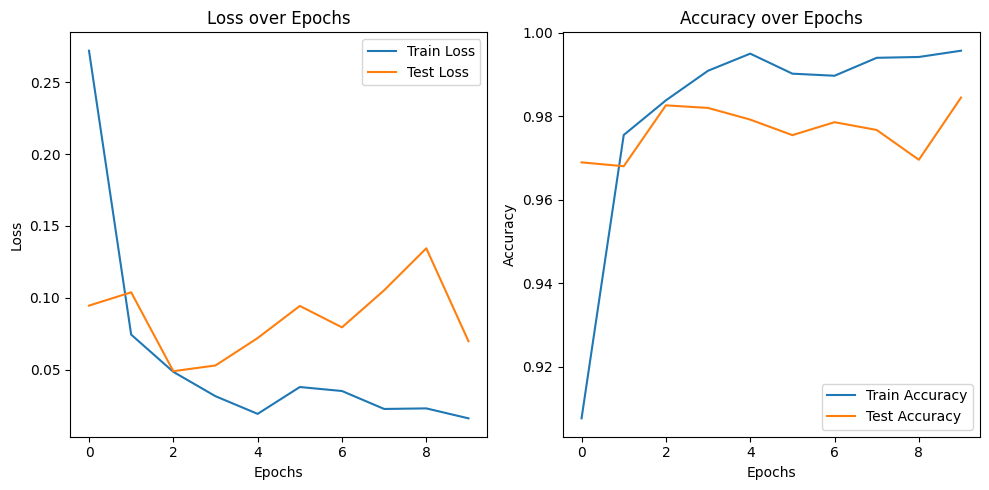

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from timm import create_model
import os

# Configuración de dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ruta del dataset
train_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/train"
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización para SwinTransformer
])

# Cargar los datasets de entrenamiento y prueba
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Cargar los DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Crear el modelo Swin Transformer (preentrenado en ImageNet)
model = create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=len(train_dataset.classes))
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Función para entrenar el modelo
def train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    train_loss_history = []
    test_loss_history = []
    train_acc_history = []
    test_acc_history = []

    for epoch in range(num_epochs):
        print(f"--- Epoch {epoch+1}/{num_epochs} ---")

        # Modo de entrenamiento
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calcular pérdida y accuracy
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            if batch_idx % 10 == 0:  # Mostrar estado cada 10 lotes
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {loss.item():.4f}")

        epoch_loss = running_loss / total_train
        epoch_acc = correct_train / total_train
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)

        print(f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Evaluación en el set de prueba
        model.eval()
        running_loss_test = 0.0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss_test += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)

        epoch_loss_test = running_loss_test / total_test
        epoch_acc_test = correct_test / total_test
        test_loss_history.append(epoch_loss_test)
        test_acc_history.append(epoch_acc_test)

        print(f"Test Loss: {epoch_loss_test:.4f}, Test Accuracy: {epoch_acc_test:.4f}")

    return train_loss_history, test_loss_history, train_acc_history, test_acc_history

# Entrenar el modelo
num_epochs = 10
train_loss, test_loss, train_acc, test_acc = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs)

# Guardar el modelo
model_save_path = "/content/drive/MyDrive/Vision_artificial/Modelos/swin_transformer_v1.pth"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
torch.save(model.state_dict(), model_save_path)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



## Swin transformer v2

Ficha Técnica del Modelo Swin Transformer en Colab
Modelo Utilizado:

Nombre del Modelo: Swin Transformer (swin_base_patch4_window7_224).
Preentrenado en ImageNet: El modelo utiliza los pesos preentrenados en ImageNet y está ajustado para la cantidad de clases específicas de tu dataset.
Última Capa Ajustada: Se adapta a la clasificación personalizada de acuerdo con las clases del dataset cargado.
Dataset:

Dataset de Entrenamiento: Ubicado en la ruta /content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug/train.
Dataset de Prueba: Ubicado en la ruta /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test.
Transformaciones Aplicadas:
Redimensionamiento: Las imágenes se redimensionan a 224x224 píxeles.
Normalización: Los valores de los píxeles se normalizan de acuerdo con los parámetros de ImageNet:
Media: [0.485, 0.456, 0.406]
Desviación estándar: [0.229, 0.224, 0.225]
División del Dataset: El dataset de entrenamiento se divide en un 80% para el entrenamiento y un 20% para la validación mediante random_split.
Configuración de Entrenamiento:

Dispositivo: El entrenamiento se realiza en GPU si está disponible, seleccionado automáticamente por PyTorch.
Tamaño del Lote (Batch Size): 64 imágenes por lote.
Número de Épocas: 10 épocas completas de entrenamiento.
Número de Workers: 4 workers para la carga de datos, lo que permite un procesamiento paralelo más rápido.
Optimizador:

Algoritmo de Optimización: Adam (torch.optim.Adam).
Tasa de Aprendizaje Inicial: 0.0001 (1e-4).
Ajuste de la Tasa de Aprendizaje:
Se utiliza un scheduler (StepLR) para reducir la tasa de aprendizaje cada 10 épocas con un factor de 0.1.
Función de Pérdida:

Criterio: nn.CrossEntropyLoss (para clasificación multiclase).
La función de pérdida mide el error entre las predicciones del modelo y las etiquetas verdaderas.
Monitoreo del Entrenamiento:

Progreso por Batch: Cada 10 lotes (batches) se imprime el progreso de la pérdida (loss) y la precisión (accuracy). Esto permite monitorear el rendimiento del modelo durante el entrenamiento.
Resumen por Época: Al final de cada época, se muestra un resumen con el tiempo que tomó la época, la pérdida promedio y la precisión en el conjunto de entrenamiento.
Validación: Después de cada época, el modelo se evalúa en el conjunto de validación. Se muestran los resultados de la pérdida y la precisión en este conjunto.
Scheduler:

Se usa un scheduler de tipo StepLR, que reduce la tasa de aprendizaje en un factor de 0.1 después de cada 10 épocas, permitiendo un ajuste más fino a medida que avanza el entrenamiento.
Guardado del Modelo:

Al finalizar el entrenamiento, el modelo entrenado se guarda en la ruta /content/drive/MyDrive/Vision_artificial/Modelos/swin_transformer_v2.pth.
Esto permite reutilizar el modelo en futuros experimentos o pruebas sin necesidad de volver a entrenarlo desde cero.
Evaluación Final:

La precisión y pérdida del modelo se evalúan al final del entrenamiento en el conjunto de validación y prueba. Este proceso ayuda a verificar la capacidad del modelo para generalizar en datos no vistos.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from timm import create_model
import os
import time

# Configuración de dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")
print(f"GPU: {torch.cuda.get_device_name(0)}")

# Ruta del dataset
train_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug/train"
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización para SwinTransformer
])

# Cargar el dataset de entrenamiento
train_dataset = datasets.ImageFolder(train_dir, transform=transform)

# Dividir el dataset de entrenamiento en entrenamiento y validación (80%-20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Cargar el dataset de prueba
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# DataLoaders para entrenamiento, validación y prueba
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Crear el modelo Swin Transformer (preentrenado en ImageNet)
model = create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=len(train_dataset.classes))
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Scheduler para reducir la tasa de aprendizaje (opcional)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Función para entrenar el modelo
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        start_time = time.time()
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        # Entrenamiento
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calcular pérdida y accuracy
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            # Mostrar progreso cada 10 batches (saltando de línea cada vez)
            if (batch_idx + 1) % 10 == 0:
                batch_loss = running_loss / total_train
                batch_acc = correct_train / total_train
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {batch_loss:.4f} - Accuracy: {batch_acc:.4f}")

        epoch_loss = running_loss / total_train
        epoch_acc = correct_train / total_train

        # Mostrar resumen de la época
        print(f"Epoch {epoch+1}/{num_epochs} [{time.time() - start_time:.0f}s] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

        # Validación
        model.eval()
        running_loss_val = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss_val += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss_val / total_val
        val_acc = correct_val / total_val

        # Actualizar el scheduler
        scheduler.step()

        # Mostrar resultados de validación
        print(f"Validation - Loss: {val_loss:.4f} - Accuracy: {val_acc:.4f}")

# Entrenar el modelo
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# Guardar el modelo
model_save_path = "/content/drive/MyDrive/Vision_artificial/Modelos/swin_transformer_v2.pth"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
torch.save(model.state_dict(), model_save_path)


Dispositivo: cuda
GPU: NVIDIA L4


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]


Epoch 1/10
Batch 10/250 - Loss: 1.5044 - Accuracy: 0.5297
Batch 20/250 - Loss: 1.0362 - Accuracy: 0.6695
Batch 30/250 - Loss: 0.8184 - Accuracy: 0.7333
Batch 40/250 - Loss: 0.7083 - Accuracy: 0.7668
Batch 50/250 - Loss: 0.6232 - Accuracy: 0.7909
Batch 60/250 - Loss: 0.5484 - Accuracy: 0.8156
Batch 70/250 - Loss: 0.4988 - Accuracy: 0.8326
Batch 80/250 - Loss: 0.4537 - Accuracy: 0.8477
Batch 90/250 - Loss: 0.4203 - Accuracy: 0.8589
Batch 100/250 - Loss: 0.3940 - Accuracy: 0.8675
Batch 110/250 - Loss: 0.3734 - Accuracy: 0.8747
Batch 120/250 - Loss: 0.3529 - Accuracy: 0.8810
Batch 130/250 - Loss: 0.3368 - Accuracy: 0.8865
Batch 140/250 - Loss: 0.3232 - Accuracy: 0.8911
Batch 150/250 - Loss: 0.3124 - Accuracy: 0.8950
Batch 160/250 - Loss: 0.3006 - Accuracy: 0.8993
Batch 170/250 - Loss: 0.2930 - Accuracy: 0.9028
Batch 180/250 - Loss: 0.2838 - Accuracy: 0.9059
Batch 190/250 - Loss: 0.2758 - Accuracy: 0.9086
Batch 200/250 - Loss: 0.2685 - Accuracy: 0.9109
Batch 210/250 - Loss: 0.2630 - Accura

el tiempo de entrenamiento fue de 1 hora 2 minutos

### Grafica Accuracy vs epoch y loss vs epoch Swin transformer

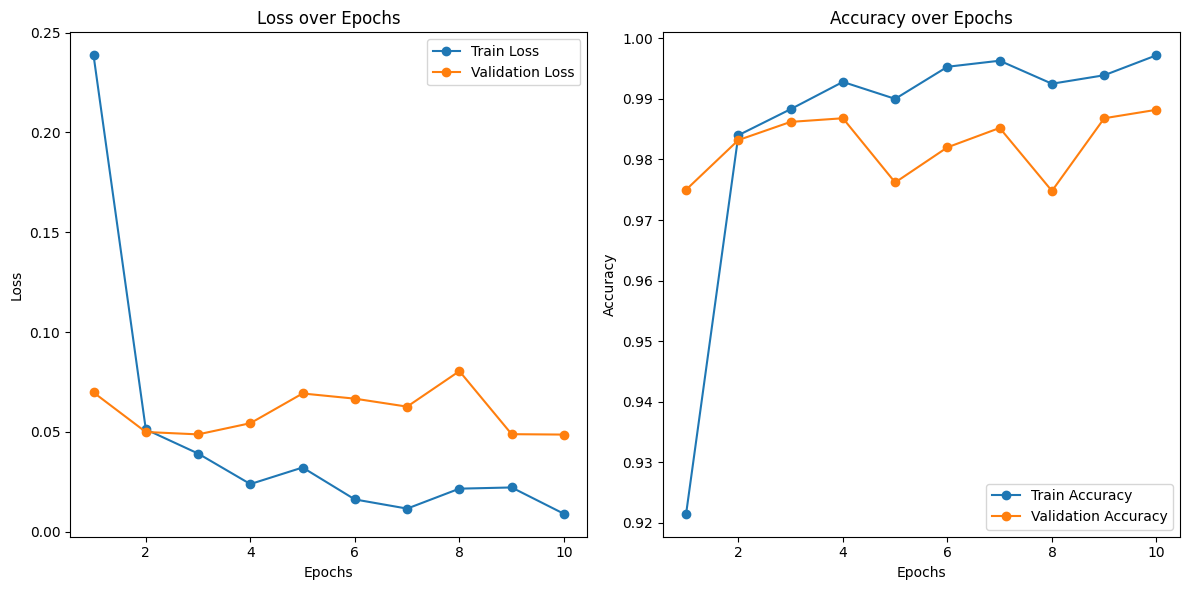

In [ ]:
import matplotlib.pyplot as plt

# Datos proporcionados (resumen de las épocas)
epochs = list(range(1, 11))
train_loss = [0.2387, 0.0512, 0.0391, 0.0238, 0.0321, 0.0161, 0.0115, 0.0215, 0.0221, 0.0089]
train_accuracy = [0.9215, 0.9840, 0.9883, 0.9928, 0.9900, 0.9953, 0.9963, 0.9925, 0.9939, 0.9972]
val_loss = [0.0697, 0.0499, 0.0487, 0.0543, 0.0692, 0.0666, 0.0626, 0.0804, 0.0488, 0.0486]
val_accuracy = [0.9750, 0.9832, 0.9862, 0.9868, 0.9762, 0.9820, 0.9852, 0.9748, 0.9868, 0.9882]

# Crear la figura
plt.figure(figsize=(12, 6))

# Gráfica de la pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfica de la precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### Matriz de confusion Swin Trasnformer

<ipython-input-4-e72c1b1bfd5d>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


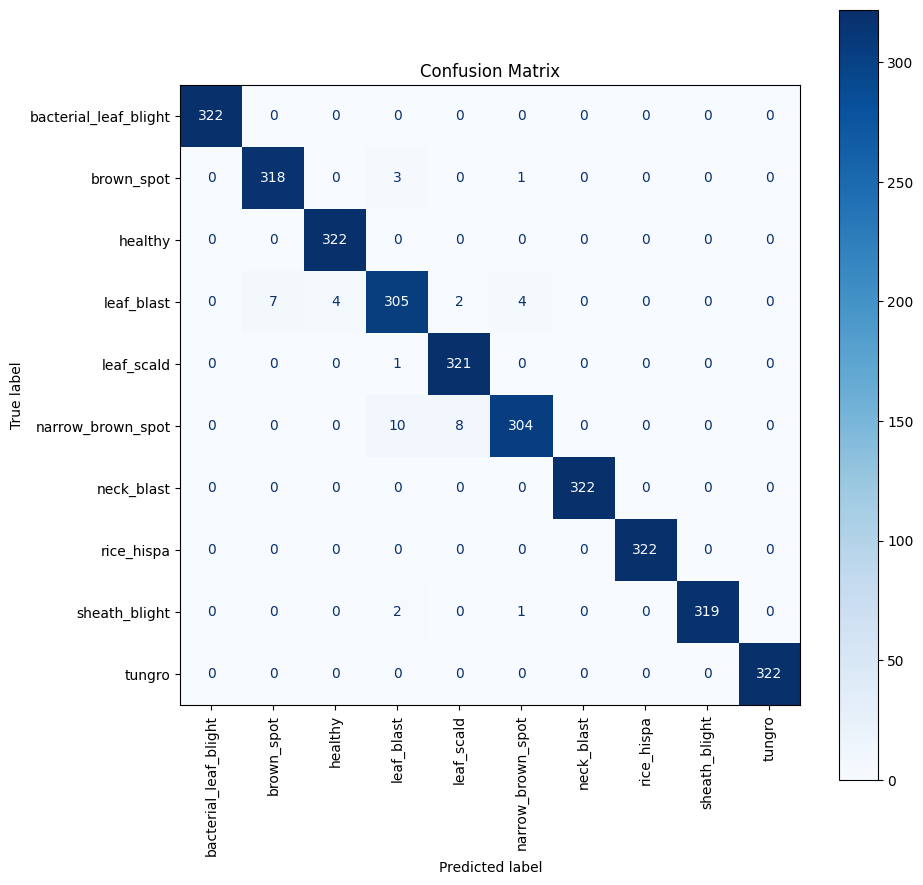

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from timm import create_model
import matplotlib.pyplot as plt

# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ruta del modelo guardado y del dataset de prueba
model_path = "/content/drive/MyDrive/Vision_artificial/Modelos/swin_transformer_v2.pth"
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes (deberían coincidir con las usadas durante el entrenamiento)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cargar el dataset de prueba
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Cargar el modelo
model = create_model('swin_base_patch4_window7_224', pretrained=False, num_classes=len(test_dataset.classes))
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Listas para verdaderos y predichos
y_pred = []
y_true = []

# Evaluar el modelo para obtener predicciones
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = test_dataset.classes

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()


## Modelo ViT Vision Transformer

Modelo Utilizado:

Nombre del Modelo: Vision Transformer (ViT, vit_base_patch16_224).
Preentrenado en ImageNet: El modelo utiliza pesos preentrenados en ImageNet y está ajustado para la cantidad de clases específicas en tu dataset personalizado.
Última Capa Ajustada: El modelo se ha modificado para ajustarse a la clasificación personalizada de acuerdo con las clases en el dataset.
Dataset:

Dataset de Entrenamiento: Ubicado en la ruta /content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug/train.
Dataset de Prueba: Ubicado en la ruta /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test.
Transformaciones Aplicadas:

Redimensionamiento: Las imágenes se redimensionan a un tamaño fijo de 224x224 píxeles para cumplir con los requisitos de entrada del modelo ViT.
Normalización: Los valores de los píxeles se normalizan de acuerdo con los parámetros de ImageNet:
Media: [0.485, 0.456, 0.406]
Desviación Estándar: [0.229, 0.224, 0.225]
División del Dataset: El dataset de entrenamiento se divide en un 80% para entrenamiento y un 20% para validación mediante random_split.
Configuración de Entrenamiento:

Dispositivo: El entrenamiento se realiza en GPU si está disponible. El dispositivo se selecciona automáticamente con PyTorch (torch.device("cuda" if torch.cuda.is_available() else "cpu")).
Tamaño del Lote (Batch Size): 64 imágenes por lote.
Número de Épocas: 10 épocas completas de entrenamiento.
Número de Workers: 4 workers para la carga de datos, lo que permite un procesamiento paralelo más rápido en la preparación de los lotes.
Optimizador:

Algoritmo de Optimización: Adam (torch.optim.Adam).
Tasa de Aprendizaje Inicial: 0.0001 (1e-4).
Ajuste de la Tasa de Aprendizaje: Se utiliza un scheduler (StepLR) para reducir la tasa de aprendizaje en un factor de 0.1 después de cada 10 épocas. Este ajuste ayuda a un entrenamiento más efectivo al progresar.
Función de Pérdida:

Criterio: nn.CrossEntropyLoss (para clasificación multiclase).
La función de pérdida mide la diferencia entre las predicciones del modelo y las etiquetas verdaderas, lo que guía el entrenamiento.
Monitoreo del Entrenamiento:

Progreso por Batch: Cada 10 lotes (batches), se imprime el progreso de la pérdida (loss) y la precisión (accuracy). Esto permite monitorear el rendimiento del modelo durante el entrenamiento, proporcionando métricas continuas de mejora.
Resumen por Época: Al final de cada época, se muestra un resumen que incluye el tiempo transcurrido en la época, la pérdida promedio y la precisión en el conjunto de entrenamiento.
Validación:

Después de cada época, el modelo se evalúa en el conjunto de validación. Se muestran los resultados de la pérdida y la precisión en este conjunto, proporcionando una evaluación continua del rendimiento del modelo en datos no utilizados para el entrenamiento directo.
Scheduler:

Scheduler: StepLR se utiliza para reducir la tasa de aprendizaje en un factor de 0.1 después de 10 épocas. Esto ayuda a ajustar finamente el entrenamiento a medida que progresa y permite estabilizar la optimización en las últimas etapas.
Guardado del Modelo:

Al finalizar el entrenamiento, el modelo entrenado se guarda en la ruta /content/drive/MyDrive/Vision_artificial/Modelos/vit_transformer_v1.pth. Esto permite reutilizar el modelo en futuros experimentos o pruebas sin necesidad de volver a entrenarlo desde cero.
Evaluación Final:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from timm import create_model
import os
import time

# Configuración de dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")
print(f"GPU: {torch.cuda.get_device_name(0)}")

# Ruta del dataset
train_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug/train"
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cargar el dataset de entrenamiento
train_dataset = datasets.ImageFolder(train_dir, transform=transform)

# Dividir el dataset de entrenamiento en entrenamiento y validación (80%-20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Cargar el dataset de prueba
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# DataLoaders para entrenamiento, validación y prueba
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Crear el modelo Vision Transformer (ViT)
model = create_model('vit_base_patch16_224', pretrained=True, num_classes=len(train_dataset.classes))
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Scheduler para reducir la tasa de aprendizaje (opcional)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Función para entrenar el modelo
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        start_time = time.time()
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        # Entrenamiento
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calcular pérdida y accuracy
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            # Mostrar progreso cada 10 batches
            if (batch_idx + 1) % 10 == 0:
                batch_loss = running_loss / total_train
                batch_acc = correct_train / total_train
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {batch_loss:.4f} - Accuracy: {batch_acc:.4f}")

        epoch_loss = running_loss / total_train
        epoch_acc = correct_train / total_train

        # Mostrar resumen de la época
        print(f"Epoch {epoch+1}/{num_epochs} [{time.time() - start_time:.0f}s] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

        # Validación
        model.eval()
        running_loss_val = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss_val += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss_val / total_val
        val_acc = correct_val / total_val

        # Actualizar el scheduler
        scheduler.step()

        # Mostrar resultados de validación
        print(f"Validation - Loss: {val_loss:.4f} - Accuracy: {val_acc:.4f}")

# Entrenar el modelo
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# Guardar el modelo
model_save_path = "/content/drive/MyDrive/Vision_artificial/Modelos/vit_transformer_v1.pth"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
torch.save(model.state_dict(), model_save_path)


Dispositivo: cuda
GPU: NVIDIA L4

Epoch 1/10
Batch 10/250 - Loss: 1.9418 - Accuracy: 0.3516
Batch 20/250 - Loss: 1.4159 - Accuracy: 0.5375
Batch 30/250 - Loss: 1.1366 - Accuracy: 0.6250
Batch 40/250 - Loss: 0.9691 - Accuracy: 0.6766
Batch 50/250 - Loss: 0.8396 - Accuracy: 0.7197
Batch 60/250 - Loss: 0.7511 - Accuracy: 0.7479
Batch 70/250 - Loss: 0.6809 - Accuracy: 0.7708
Batch 80/250 - Loss: 0.6344 - Accuracy: 0.7857
Batch 90/250 - Loss: 0.5960 - Accuracy: 0.7997
Batch 100/250 - Loss: 0.5639 - Accuracy: 0.8105
Batch 110/250 - Loss: 0.5372 - Accuracy: 0.8197
Batch 120/250 - Loss: 0.5081 - Accuracy: 0.8292
Batch 130/250 - Loss: 0.4841 - Accuracy: 0.8374
Batch 140/250 - Loss: 0.4622 - Accuracy: 0.8450
Batch 150/250 - Loss: 0.4449 - Accuracy: 0.8509
Batch 160/250 - Loss: 0.4287 - Accuracy: 0.8567
Batch 170/250 - Loss: 0.4146 - Accuracy: 0.8617
Batch 180/250 - Loss: 0.3995 - Accuracy: 0.8668
Batch 190/250 - Loss: 0.3876 - Accuracy: 0.8707
Batch 200/250 - Loss: 0.3754 - Accuracy: 0.8747
Batc

El tiempo de entrenamiento fue de 42 minutos 11 segundos

### Grafica Accuracy vs epoch y loss vs epoch Vision transformer (ViT)

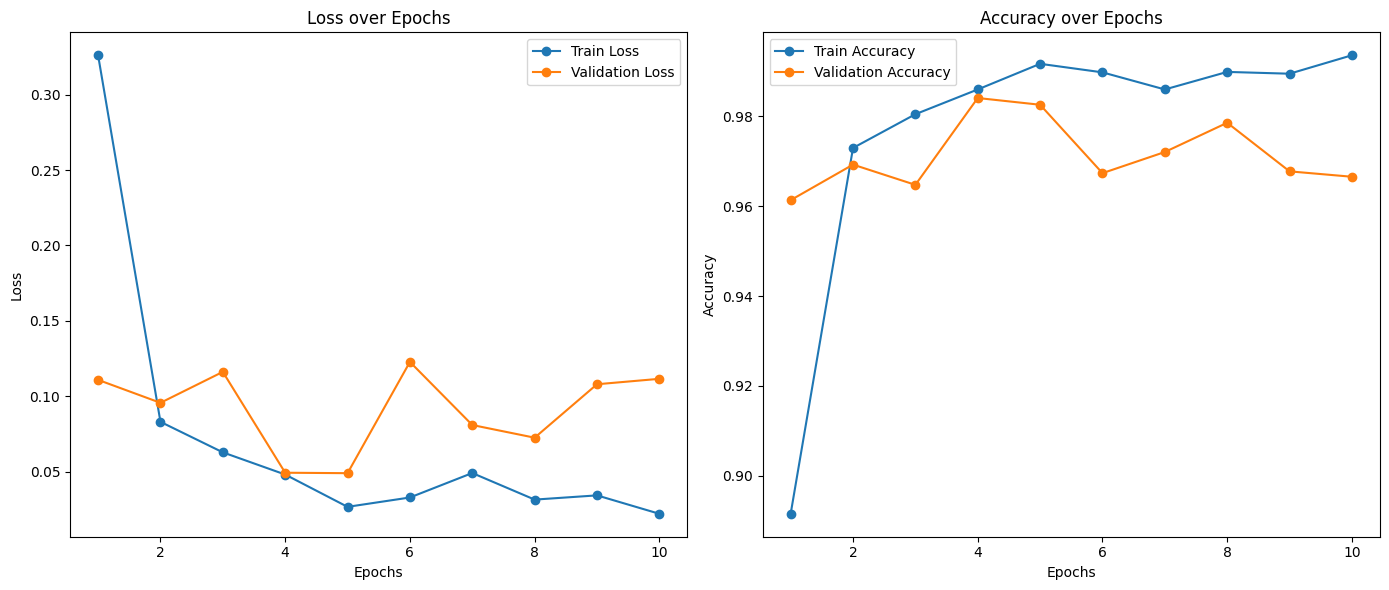

In [ ]:
import matplotlib.pyplot as plt

# Datos de Loss y Accuracy para entrenamiento y validación
epochs = list(range(1, 11))
train_loss = [0.3260, 0.0832, 0.0630, 0.0483, 0.0269, 0.0331, 0.0493, 0.0317, 0.0345, 0.0223]
val_loss = [0.1110, 0.0958, 0.1163, 0.0495, 0.0492, 0.1229, 0.0811, 0.0727, 0.1081, 0.1117]
train_acc = [0.8916, 0.9729, 0.9804, 0.9859, 0.9916, 0.9897, 0.9859, 0.9898, 0.9894, 0.9935]
val_acc = [0.9613, 0.9692, 0.9647, 0.9840, 0.9825, 0.9673, 0.9720, 0.9785, 0.9677, 0.9665]

# Gráfico de pérdida (Loss) y precisión (Accuracy)
plt.figure(figsize=(14, 6))

# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico de Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Matriz de confusion Vision transformer (ViT)

<ipython-input-11-2d7b254032b8>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


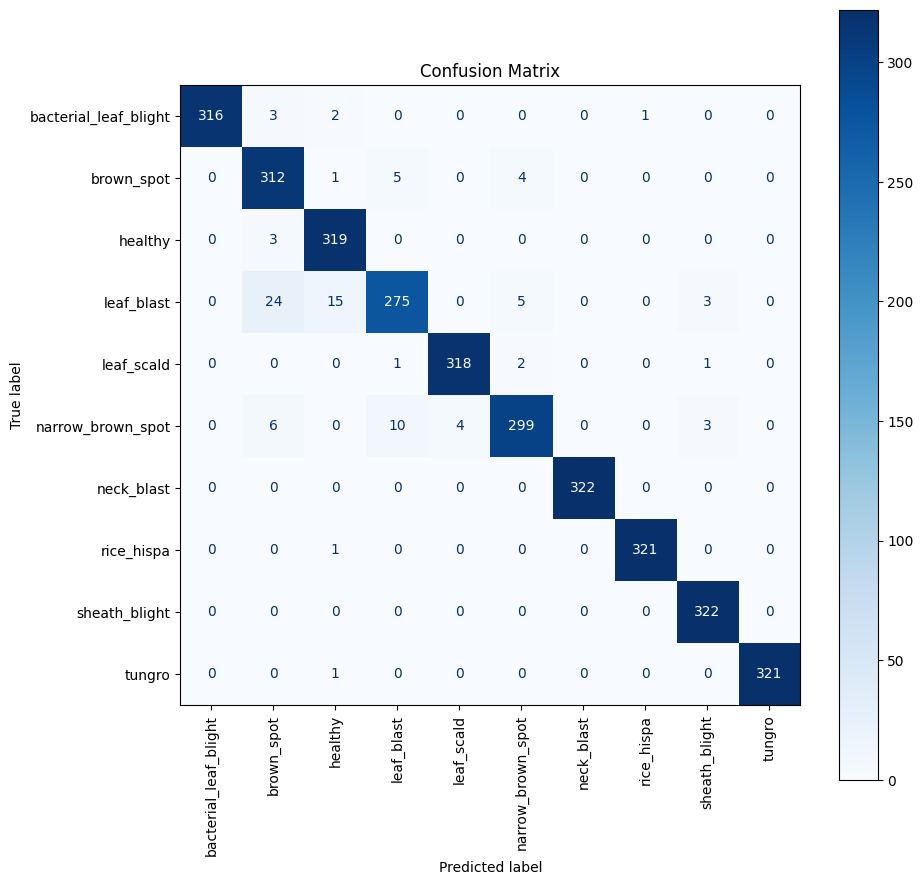

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from timm import create_model
import matplotlib.pyplot as plt

# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ruta del modelo guardado y del dataset de prueba
model_path = "/content/drive/MyDrive/Vision_artificial/Modelos/vit_transformer_v1.pth"  # Asegúrate de cambiar esto a la ruta correcta de tu modelo ViT
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes (deberían coincidir con las usadas durante el entrenamiento)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cargar el dataset de prueba
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Cargar el modelo ViT
model = create_model('vit_base_patch16_224', pretrained=False, num_classes=len(test_dataset.classes))  # Cambia 'swin_base_patch4_window7_224' por 'vit_base_patch16_224'
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Listas para verdaderos y predichos
y_pred = []
y_true = []

# Evaluar el modelo para obtener predicciones
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = test_dataset.classes

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()



## Data-efficient Image Transformers (DeiT)

Modelo Utilizado:

Nombre del Modelo: Data-efficient Image Transformers (DeiT, deit_base_patch16_224).
Preentrenado en ImageNet: El modelo utiliza pesos preentrenados en ImageNet y se ajusta para la clasificación específica del dataset personalizado.
Última Capa Ajustada: La última capa del modelo se adapta para ajustar la cantidad de clases en el dataset de entrenamiento.
Dataset:

Dataset de Entrenamiento: Ubicado en la ruta /content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug/train.
Dataset de Prueba: Ubicado en la ruta /content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test.
Transformaciones Aplicadas:

Redimensionamiento: Las imágenes se redimensionan a 224x224 píxeles para cumplir con el tamaño de entrada requerido por el modelo DeiT.
Normalización: Los valores de los píxeles se normalizan según los parámetros de ImageNet:
Media: [0.485, 0.456, 0.406]
Desviación Estándar: [0.229, 0.224, 0.225]
División del Dataset: El dataset de entrenamiento se divide en un 80% para entrenamiento y un 20% para validación usando random_split.
Configuración de Entrenamiento:

Dispositivo: El entrenamiento se realiza en GPU si está disponible, usando torch.device("cuda" if torch.cuda.is_available() else "cpu").
Tamaño del Lote (Batch Size): 64 imágenes por lote.
Número de Épocas: El modelo se entrena durante 10 épocas completas.
Número de Workers: 4 workers para la carga de datos, permitiendo un procesamiento paralelo más eficiente en la preparación de los lotes.
Optimizador:

Algoritmo de Optimización: Adam (torch.optim.Adam).
Tasa de Aprendizaje Inicial: 0.0001 (1e-4).
Ajuste de la Tasa de Aprendizaje: Se utiliza un scheduler de tipo StepLR que reduce la tasa de aprendizaje en un factor de 0.1 después de cada 10 épocas para permitir una convergencia más efectiva.
Función de Pérdida:

Criterio: nn.CrossEntropyLoss (para clasificación multiclase).
La función de pérdida mide el error entre las predicciones del modelo y las etiquetas reales.
Monitoreo del Entrenamiento:

Progreso por Batch: Cada 10 lotes (batches), se imprime el progreso del entrenamiento en términos de la pérdida (loss) y la precisión (accuracy). Esto permite un monitoreo continuo del rendimiento del modelo durante el entrenamiento.
Resumen por Época: Al finalizar cada época, se muestra un resumen que incluye el tiempo transcurrido en la época, la pérdida promedio y la precisión obtenida en el conjunto de entrenamiento.
Validación:

Al final de cada época, el modelo se evalúa en el conjunto de validación. Los resultados de pérdida y precisión en este conjunto se muestran para proporcionar una visión clara de cómo generaliza el modelo a datos no utilizados en el entrenamiento.
Scheduler:

Scheduler: Se usa un scheduler de tipo StepLR, que reduce la tasa de aprendizaje en un factor de 0.1 después de 10 épocas. Esto permite ajustes más finos en las últimas etapas del entrenamiento.
Guardado del Modelo:

El modelo entrenado se guarda en la ruta /content/drive/MyDrive/Vision_artificial/Modelos/deit_model_v1.pth. Guardar el modelo permite reutilizarlo para futuras evaluaciones sin necesidad de volver a entrenarlo.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from timm import create_model
import os
import time

# Configuración de dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")
print(f"GPU: {torch.cuda.get_device_name(0)}")

# Ruta del dataset
train_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_aug/train"
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cargar el dataset de entrenamiento
train_dataset = datasets.ImageFolder(train_dir, transform=transform)

# Dividir el dataset de entrenamiento en entrenamiento y validación (80%-20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Cargar el dataset de prueba
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# DataLoaders para entrenamiento, validación y prueba
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Crear el modelo DeiT (preentrenado en ImageNet)
model = create_model('deit_base_patch16_224', pretrained=True, num_classes=len(train_dataset.classes))
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Scheduler para reducir la tasa de aprendizaje (opcional)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Función para entrenar el modelo
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        start_time = time.time()
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        # Entrenamiento
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calcular pérdida y accuracy
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            # Mostrar progreso cada 10 batches (saltando de línea cada vez)
            if (batch_idx + 1) % 10 == 0:
                batch_loss = running_loss / total_train
                batch_acc = correct_train / total_train
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {batch_loss:.4f} - Accuracy: {batch_acc:.4f}")

        epoch_loss = running_loss / total_train
        epoch_acc = correct_train / total_train

        # Mostrar resumen de la época
        print(f"Epoch {epoch+1}/{num_epochs} [{time.time() - start_time:.0f}s] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

        # Validación
        model.eval()
        running_loss_val = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss_val += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss_val / total_val
        val_acc = correct_val / total_val

        # Actualizar el scheduler
        scheduler.step()

        # Mostrar resultados de validación
        print(f"Validation - Loss: {val_loss:.4f} - Accuracy: {val_acc:.4f}")

# Entrenar el modelo
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# Guardar el modelo
model_save_path = "/content/drive/MyDrive/Vision_artificial/Modelos/deit_model_v1.pth"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
torch.save(model.state_dict(), model_save_path)


Dispositivo: cuda
GPU: NVIDIA L4


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]


Epoch 1/10
Batch 10/250 - Loss: 1.5280 - Accuracy: 0.5156
Batch 20/250 - Loss: 1.0686 - Accuracy: 0.6625
Batch 30/250 - Loss: 0.8407 - Accuracy: 0.7354
Batch 40/250 - Loss: 0.7055 - Accuracy: 0.7781
Batch 50/250 - Loss: 0.6126 - Accuracy: 0.8075
Batch 60/250 - Loss: 0.5446 - Accuracy: 0.8302
Batch 70/250 - Loss: 0.4941 - Accuracy: 0.8446
Batch 80/250 - Loss: 0.4536 - Accuracy: 0.8576
Batch 90/250 - Loss: 0.4224 - Accuracy: 0.8675
Batch 100/250 - Loss: 0.3959 - Accuracy: 0.8767
Batch 110/250 - Loss: 0.3730 - Accuracy: 0.8835
Batch 120/250 - Loss: 0.3564 - Accuracy: 0.8884
Batch 130/250 - Loss: 0.3382 - Accuracy: 0.8936
Batch 140/250 - Loss: 0.3255 - Accuracy: 0.8971
Batch 150/250 - Loss: 0.3134 - Accuracy: 0.9011
Batch 160/250 - Loss: 0.3012 - Accuracy: 0.9050
Batch 170/250 - Loss: 0.2901 - Accuracy: 0.9081
Batch 180/250 - Loss: 0.2790 - Accuracy: 0.9116
Batch 190/250 - Loss: 0.2675 - Accuracy: 0.9150
Batch 200/250 - Loss: 0.2600 - Accuracy: 0.9176
Batch 210/250 - Loss: 0.2520 - Accura

### Grafica Accuracy vs epoch y loss vs epoch Data-efficient Image Transformers

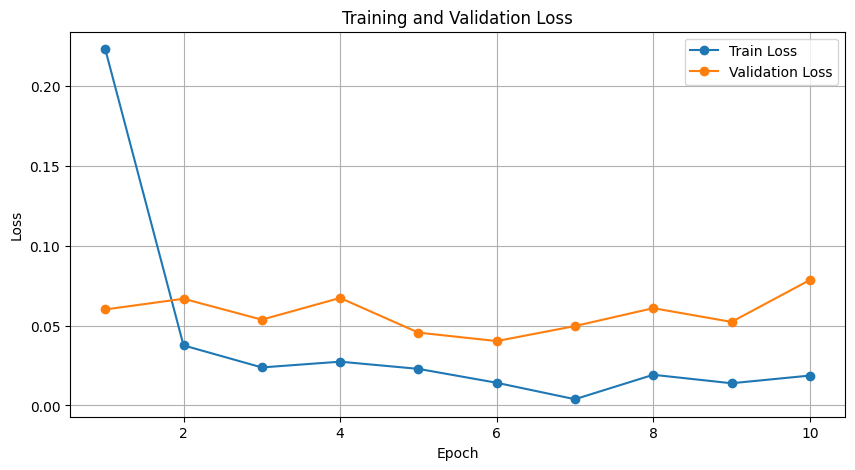

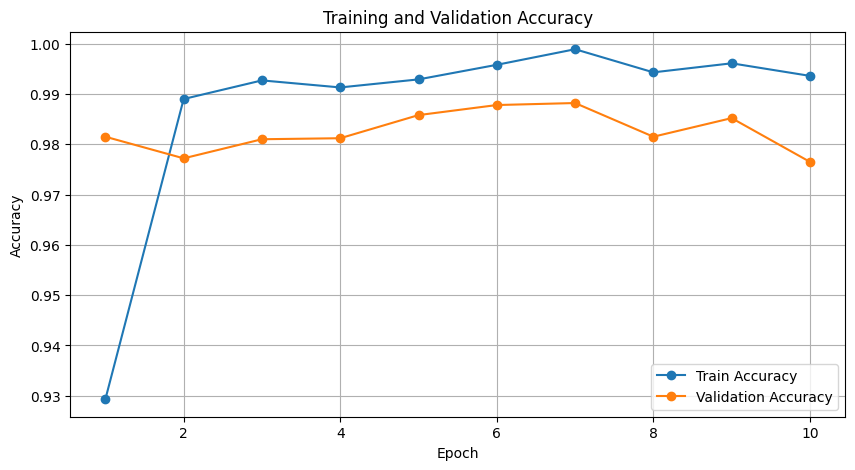

In [ ]:
import matplotlib.pyplot as plt

# Datos de las épocas
epochs = list(range(1, 11))

# Datos de pérdida (Loss) por época
loss_train = [0.2230, 0.0376, 0.0238, 0.0274, 0.0229, 0.0142, 0.0039, 0.0192, 0.0139, 0.0187]
loss_val = [0.0601, 0.0668, 0.0537, 0.0673, 0.0456, 0.0403, 0.0497, 0.0609, 0.0523, 0.0785]

# Datos de precisión (Accuracy) por época
acc_train = [0.9293, 0.9890, 0.9927, 0.9913, 0.9929, 0.9958, 0.9989, 0.9943, 0.9961, 0.9936]
acc_val = [0.9815, 0.9772, 0.9810, 0.9812, 0.9858, 0.9878, 0.9882, 0.9815, 0.9852, 0.9765]

# Crear la gráfica de Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_train, label='Train Loss', marker='o')
plt.plot(epochs, loss_val, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica de Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc_train, label='Train Accuracy', marker='o')
plt.plot(epochs, acc_val, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Matriz de confusion Data-efficient Image Transformers (DeiT)

<ipython-input-2-cc6086fdf92d>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


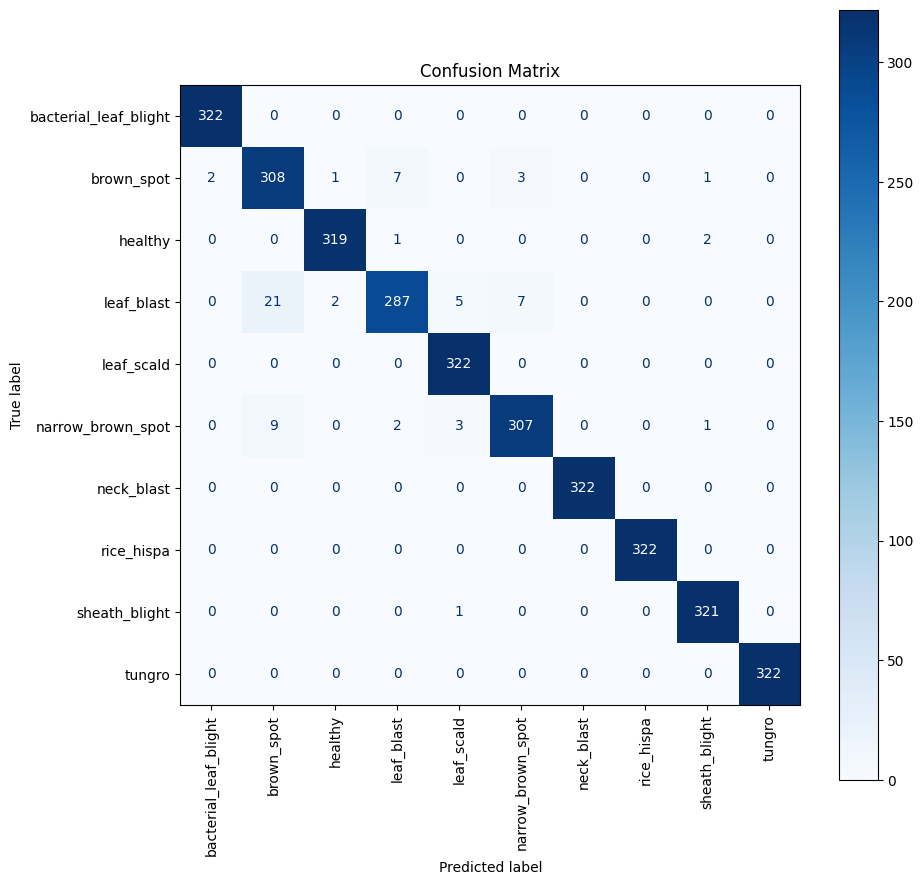

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from timm import create_model
import matplotlib.pyplot as plt

# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ruta del modelo guardado y del dataset de prueba
model_path = "/content/drive/MyDrive/Vision_artificial/Modelos/deit_model_v1.pth"
test_dir = "/content/drive/MyDrive/Vision_artificial/Dataset/dataset_balanced_div/test"

# Transformaciones para las imágenes (deberían coincidir con las usadas durante el entrenamiento)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Cargar el dataset de prueba
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Cargar el modelo
model = create_model('deit_base_patch16_224', pretrained=False, num_classes=len(test_dataset.classes))
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Listas para verdaderos y predichos
y_pred = []
y_true = []

# Evaluar el modelo para obtener predicciones
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = test_dataset.classes

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()
